In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import orth_dist_reg_data

# 18.1 Nonlinear equations and least squares

## Nonlinear equations

- A set of $m$ possibly nonlinear equations in $n$ unknowns (or variables) (n-vector) $x = (x_1, \ldots , x_n)$ 
$$
f_i(x_1, \ldots, x_n) = f_i(x) = 0, \quad i = 1, \ldots, m
$$
where $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ is a scalar-valued function.
- We refer to $f_i(x) = 0$ as the $i$th equation.
- For any $x$ we call $f_i(x)$ the $i$th *residual*, since it is a quantity we want to be zero.
-  Assuming the **right-hand sides of the equations are zero** will simplify formulas and equations. \
   If we need to solve$f_i(x) = b_i, \quad i = 1, \ldots, m$, where $b_i$ are some given nonzero numbers, we define $\tilde{f}_i(x) = f_i(x) − b_i$, and solve $\tilde{f}_i(x) = 0, \quad i = 1, \ldots, m$
- write the set of equations in the compact vector form $f(x) = \mathbf{0}$ where $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$
$$
f(x) = (f_1(x), \ldots, f_m(x))
$$
- when $f$ is affine, reduces to set of $m$ linear equations

## Nonlinear least squares

- When we cannot find a solution of $f(x)=0$, we can seek an **approximate solution** $\hat{x}$, by finding x that **minimizes the sum of squares of the residuals**,
$$
\|f(x)\|^2 = f_1(x)^2 + \cdots + f_m(x)^2
$$
- The *nonlinear least squares problem* $\text{minimize} \ f\|f(x)\|^2$ includes the problem of solving nonlinear equations $f(x)=0$ as a special case

## Optimality condition

- **optimality condition**: The partial derivative of $\|f(x)\|^2$ with respect to each of $x_1, \ldots, x_n$ must vanish at $\hat{x}$:
$$
\frac{\partial}{\partial x_i} \|f(\hat{x})\|^2 = 0, \quad i = 1, \ldots, n,
$$
or, in vector form,
$$
\nabla \|f(\hat{x})\|^2 = 0
$$
    - any optimal point satisfies this
    - points can satisfy this and not be optimal
    - optimality condition is called a **necessary condition** for optimality
- can be expressed as
$$
\nabla \|f(\hat{x})\|^2 = \nabla (\sum_{i=1}^m {f_i(\hat{x})^2}) = 2 \sum_{i=1}^m f_i(\hat{x}) \nabla f_i(\hat{x}) = 2D f(\hat{x})^T f(\hat{x}) = 0
$$
- $D f(\hat{x})$ is the m × n derivative or **Jacobian matrix**,
$$
Df(\hat{x})_{ij} = \frac{\partial f_i}{\partial x_j}(\hat{x}), \quad i = 1, \ldots, m, \quad j = 1, \ldots, n
$$
- optimality condition reduces to normal equations when $f$ is affine

##  Difficulty of solving nonlinear equations or nonlinear least squares problem

- For nonlinear equations, it is a very difficult calculation problem to **determine** that there is
    1. no solution
    2. any number of solutions
    3. infinite number of solutions
- so we will use heuristic algorithms:
    - not guaranteed to always work
    - but often work well in practice \
    (like k-means)

# 18.2 Gauss–Newton algorithm

- heuristic algorithm for the nonlinear least squares problem
- iterative algorithms that generate a sequence of points $x^{(1)}, x^{(2)}, \ldots$
- The vector $x^{(1)}$ is called the *starting point* of the algorithm, and $x^{(k)}$ is called the $k$th iterate.
- Moving from $x^{(k)}$ to $x^{(k+1)}$ is called an *iteration* of the algorithm.
- The algorithm is terminated when 
    1. $\|f(x^{(k)})\|$ is small enough
    2. $x^{(k+1)}$ is very near $x^{(k)}$
    3. a maximum number of iterations is reached

## Basic Gauss–Newton algorithm

We alternate between

---

1. **finding an affine approximation** of the function $f$ at the current iterate,

    At each iteration $k$, we form the affine approximation $\hat{f}$ of $f$ at the current iterate $x^{(k)}$ , given by the Taylor approximation
$$
f(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x − x^{(k)}), 
$$
    where the m×n matrix $Df(x^{(k)})$ is the **Jacobian** or derivative matrix of $f$

---
2. and then solving the associated **linear least squares problem** to find the next iterate.
    The next iterate $x^{(k+1)}$ is then taken to be the minimizer of $\|\hat{f}(x; x^{(k)})\|^2$, the norm squared of the affine approximation of $f$ at $x^{(k)}$. Assuming that the derivative matrix $Df(x^{(k)})$ has **linearly independent columns** (which requires m ≥ n), we have
$$
x^{(k+1)} = x^{(k)} − \big( Df(x^{(k)})^T Df(x^{(k)}) \big)^{−1} Df(x^{(k)})^T f(x^{(k)}).
$$


The norm of the **residual of the approximation** goes down in each iteration. 
$$
\|\hat{f}(x^{(k+1)}; x^{(k)})\|^2 \le \| \hat{f}(x^{(k)}; x^{(k)})\|^2 = \|f(x^{(k)})\|^2
$$
This is not the same as 
$$
\|f(x^{(k+1)})\|^2 \le \|f(x^{(k)})\|^2
$$

---
**Derivation**
$$
\text{minimize} \ \|f(x^{(k)}) + Df(x^{(k)})(x − x^{(k)}) \|^2
$$

Let $\tilde{A} = Df(x^{(k)})$, $\tilde{x} = (x − x^{(k)})$, $b = -f(x^{(k)})$, then use Normal equation $\hat{x} = (A^T A)^{-1} A^T b$

we get
$$
\begin{align}
x^{(k+1)} - x^{(k)} &= \big( Df(x^{(k)})^T Df(x^{(k)}) \big)^{−1} Df(x^{(k)})^T  (-f(x^{(k)})) \\
x^{(k+1)} &= x^{(k)} − \big( Df(x^{(k)})^T Df(x^{(k)}) \big)^{−1} Df(x^{(k)})^T f(x^{(k)})
\end{align}
$$

**Algorithm** *Basic Gauss–Newton algorithm for nonlinear least squares*

**given** a differentiable function $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$, an initial point $x^{(1)}$.

For $k = 1, 2, \ldots , k^{max}$
1. Form affine approximation at current iterate using calculus. Evaluate the Jacobian $Df(x^{(k)})$ and define
$$
f(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x − x^{(k)}).
$$

2. Update iterate using linear least squares. Set $x^{(k+1)}$ as the minimizer of $\|\hat{f}(x; x^{(k)})\|^2$,
$$
x^{(k+1)} = x^{(k)} − \big( Df(x^{(k)})^T Df(x^{(k)}) \big)^{−1} Df(x^{(k)})^T f(x^{(k)}).
$$

**Shortcomings of the basic Gauss–Newton algorithm**
1. **diverge**: when $x^{(k+1)}$ is not near $x^{(k)}$, $\|f(x^{(k+1)})\|^2$ and $\|\hat{f}(x^{(k+1)}; x^{(k)})\|^2$ can be very different.
2. assume that the columns of the derivative matrix $Df(x(k))$ are linearly independent.

"Let’s first implement the basic Gauss-Newton method (algorithm 18.1 in VMLS) in Python. In Python, you can pass a function as an argument to another function, so we can pass `f` (the function) and also `Df` (the derivative or Jacobian matrix) to our Gauss-Newton algorithm."

In [2]:
def gauss_newton(f, Df, x1, kmax=10):
    x = x1
    for k in range(kmax):
        x = x - np.linalg.lstsq(Df(x), f(x))
    return x

"Here we simply run the algorithm for a fixed number of iterations `kmax`, specified by an optimal keyword argument with default value 10. The code does not verify whether the final x is actually a solution, and it will break down when $Df(x^{(k)})$ has linearly dependent columns. This very simple implementation is only for illustrative purposes;
the Levenberg-Marquardt algorithm described in the next section is better in every way."

## Newton algorithm

- For the special case **m = n**, the Gauss–Newton algorithm reduces to the Newton algorithm (Newton-Raphson algorithm).
- When m = n, the matrix $Df(x^{(k)})$ is square, so the basic Gauss–Newton update can be simplified to
$$
\begin{align}
x^{(k+1)} &= x^{(k)} − \big( Df(x^{(k)})^T Df(x^{(k)}) \big)^{−1} Df(x^{(k)})^T f(x^{(k)}) \\
x^{(k+1)} &= x^{(k)} - \big( Df(x^{(k)}) \big)^{-1} \big( Df(x^{(k)})^T \big)^{-1} Df(x^{(k)})^T f(x^{(k)}) \\
x^{(k+1)} &= x^{(k)} - \big( Df(x^{(k)}) \big)^{-1} f(x^{(k)})
\end{align}
$$
-  shares the same shortcomings as the basic Gauss–Newton algorithm, i.e., it can diverge, and the iterations terminate if the derivative matrix is not invertible.

**Algorithm** *Newton algorithm for solving nonlinear equations*

**given** a differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$, an initial point $x^{(1)}$.

For $k = 1, 2, \ldots, k^{max}$
1. Form affine approximation at current iterate. Evaluate the Jacobian $Df(x^{(k)})$ and define
$$
\hat{f}(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x − x^{(k)}).
$$
2. Update iterate by solving linear equations. Set $x^{(k+1)}$ as the solution of $\hat{f}(x; x^{(k)}) = 0$,
$$
x^{(k+1)} = x^{(k)} − \big( Df(x^{(k)}) \big)^{−1} f(x^{(k)})
$$

In [3]:
def newton(f, Df, x1, kmax=20, tol=1e-6):
    x = x1
    fnorms = np.zeros((kmax, 1))
    for k in range(kmax):
        fk = f(x)
        fnorms[k] = np.linalg.norm(fk)
        if np.linalg.norm(fk) < tol:
            break
        x = x - np.linalg.lstsq(np.vstack([Df(x)]),
                                np.vstack([fk]),
                                rcond=None)[0]
    return x, fnorms[:min(k+1, kmax)]

**Newton algorithm for n = 1**

To update $x^{(k)}$ we form the Taylor approximation
$$
\hat{f}(x; x^{(k)}) = f(x^{(k)}) + f'(x^{(k)})(x − x^{(k)})
$$
and set it to zero to find the next iterate $x^{(k+1)}$.

If $f'(x^{(k)}) \ne 0$, the solution of $\hat{f}(x; x^{(k)}) = 0$ is given by $x^{(k+1)} = x^{(k)} − f(x^{(k)})/f'(x^{(k)}).$

If $f'(x^{(k)}) = 0$, the Newton algorithm terminates with an error.

Our first example is a scalar nonlinear equation $f(x) = 0$ with
$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

In [4]:
f = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
Df = lambda x: 4 / np.power((np.exp(x) + np.exp(-x)), 2)

We first try with $x^{(1)} = 0.95$

In [5]:
x, fnorms = newton(f, Df, 0.95)
f(x)

array([[4.34519743e-07]])

In [6]:
fnorms

array([[7.39783051e-01],
       [5.94166364e-01],
       [2.30111246e-01],
       [8.67002865e-03],
       [4.34519743e-07]])

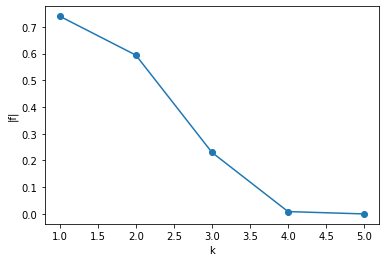

In [7]:
plt.plot(np.arange(1, fnorms.size + 1), fnorms, 'o-')
plt.xlabel('k')
plt.ylabel('|f|')
plt.show()

The method converges very quickly, as shown in above figure. However it does not converge for a slightly larger starting point $x^{(1)} = 1.15$.

In [8]:
x, fnorms = newton(f, Df, 1.15)
f(x)

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([[nan]])

In [9]:
fnorms[:5]

array([[0.81775408],
       [0.86640565],
       [0.97355685],
       [1.        ],
       [       nan]])

# 18.3 Levenberg–Marquardt algorithm

In order to overcome the divergence when searching for $x^{(k+1)}$, we adjust the objective function to two objectives:
$$
\|\hat{f}(x; x^{(k)})\|^2 + \lambda^{(k)} \|x − x^{(k)}\|^2, \\
\text{where} \ \lambda^{(k)} > 0, \ \hat{f}(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x − x^{(k)})
$$
- The first objective is an approximation of what we really want to minimize; the second objective expresses the idea that we should not move so far that we cannot trust the affine approximation.
- The second term is sometimes called a *trust penalty term*, since it penalizes choices of $x$ that are far from $x^{(k)}$
, where we cannot trust the affine approximation.
- The parameter $\lambda^{(k)}$ is sometimes called the *trust parameter*
- equivalent to minimizing
$$
\Bigg\|
\begin{bmatrix}
  Df(x^{(k)}) \\
  \sqrt{\lambda^{(k)}}I
\end{bmatrix} x
- \begin{bmatrix}
  Df(x^{k})x^{(k)} - f(x^{(k)}) \\
  \sqrt{\lambda^{(k)}} x^{(k)}
\end{bmatrix}
\Bigg\|^2
$$
Since $λ^{(k)}>0$, the stacked matrix in this least squares problem has **linearly independent columns**, even when $Df(x^{(k)})$ does not. It follows that the solution of the least squares problem **exists** and is **unique**.
- derive solution from normal equation
$$
\begin{align}
&(Df(x^{(k)})^T Df(x^{(k)}) + \lambda^{(k)} I) x^{(k+1)} \\
&= Df(x^{(k)})^T ( Df(x^{k})x^{(k)} - f(x^{(k)}) ) + \lambda^{(k)} x^{(k)} \\
&= ( Df(x^{(k)})^T Df(x^{(k)}) + \lambda^{(k)}I ) x^{(k)} − Df(x^{(k)})^T f(x^{(k)})
\end{align}
$$
$$
x^{(k+1)} = x^{(k)} − (Df(x^{(k)})^T Df(x^{(k)}) + \lambda^{(k)} I)^{-1} Df(x^{(k)})^T f(x^{(k)})
$$
- $x^{(k+1)} = x^{(k)}$ only if $2 Df(x^{(k)})^T f(x^{(k)}) = 0$, i.e., optimality condition holds

**Algorithm** Levenberg–Marquardt algorithm for nonlinear least squares

**given** a differentiable function $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$, an initial point $x$^{(1)}, an initial trust parameter $\lambda^{(1)} > 0$.

For $k = 1, 2, \ldots , k^{max}$

1. *Form affine approximation at current iterate.* Evaluate the Jacobian $Df(x^{(k)})$ and define
$$
\hat{f}(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x − x^{(k)}).
$$
2. *Compute tentative iterate.* Set $x^{(k+1)}$ as minimizer of
$$
\|\hat{f}(x; x^{(k)})\|^2 + \lambda^{(k)} \|x − x^{(k)}\|^2.
$$
3. *Check tentative iterate.*

    If $\|f(x^{(k+1)})\|^2 < \|f(x^{(k)})\|^2$, accept iterate and reduce $\lambda$: $\lambda^{(k+1)} = 0.8 \lambda{(k)}$.
    
    Otherwise, increase $\lambda$ and do not update $x$: $\lambda^{(k+1)} = 2\lambda^{(k)}$ and $x^{(k+1)} = x^{(k)}$.

**Stopping criteria**
- *Small residual*: $\|f(x^{(k+1)})\|^2$ is small enough. This means we have (almost) solved the equations $f(x) = 0$, and therefore (almost) minimized $\|f(x)\|^2$.
- *Small optimality condition residual*: $\|2Df(\hat{x})^T f(\hat{x})\|$ is small enough, i.e., the optimality condition almost holds.

**Levenberg–Marquardt update for n = 1**
$$
x^{(k+1)} = x^{(k)} − \frac{f'(x^{(k)})} {\lambda^{(k)} + (f'(x^{(k)}))^2} f(x^{(k)})
$$

In [10]:
def levenberg_marquardt(f, Df, x1, lambda1, kmax=100, tol=1e-6):
    n = len(x1)
    x = x1
    lambda_ = lambda1
    objectives = np.zeros((kmax, 1))
    residuals = np.zeros((kmax, 1))
    for k in range(kmax):
        fk = f(x)
        Dfk = Df(x)
        objectives[k] = np.linalg.norm(fk) ** 2
        residuals[k] = np.linalg.norm(2 * Dfk.T @ fk)
        if np.linalg.norm(2 * Dfk.T @ fk) < tol:
            break
        xt = x - np.linalg.lstsq(np.vstack([Dfk, np.sqrt(lambda_) * np.eye(n)]),
                                 np.vstack([fk, np.zeros((n, 1))]),
                                 rcond=None)[0]
        if np.linalg.norm(f(xt)) < np.linalg.norm(fk):
            lambda_ = 0.8 * lambda_
            x = xt
        else:
            lambda_ = 2 * lambda_
    return x, {"objectives": objectives[:min(k+1, kmax)], "residuals": residuals[:min(k+1, kmax)]}

**Nonlinear equation** We apply the algorithm to the scalar function
$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
with the starting point $x^{(1)} = 1.15$.

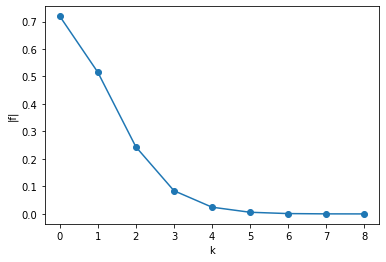

In [11]:
f = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
Df = lambda x: 4 / np.power((np.exp(x) + np.exp(-x)), 2)
x, history = levenberg_marquardt(f, Df, np.array([1.15]), 1.0)
plt.plot(np.sqrt(history['objectives'][1:10]), 'o-')
plt.xlabel('k')
plt.ylabel('|f|')
plt.show()

**Equilibrium prices.** We solve a nonlinear equation $f(p) = 0$ with two variables, where 
$$
f(p) = exp(E^s log(p) + s^{nom}) − exp(E^d log(p) + d^{nom}).
$$
Here `exp` and `log` are interpreted as *element-wise* vector operations. The problem parameters are $s^{nom} = (2.2, 0.3),\ d^{nom} = (3.1, 2.2)$,
$$
E^s = \begin{bmatrix}
0.5 & −0.3 \\
-0.15 & 0.8 \\
\end{bmatrix}, \quad
E^d = \begin{bmatrix}
-0.5 & 0.2 \\
0 & -0.5 \\
\end{bmatrix}
$$

In [12]:
snom = np.vstack([2.2, 0.3])
dnom = np.vstack([3.1, 2.2])
Es = np.array([[0.5, -0.3],
               [-0.15, 0.8]])
Ed = np.array([[-0.5, 0.2],
               [0,-0.5]])
f = lambda p: (np.exp(Es @ np.log(p) + snom) - np.exp(Ed @ np.log(p) + dnom))

def Df(p):
    S = np.exp(Es @ np.log(p) + snom)
    D = np.exp(Ed @ np.log(p) + dnom)
    dS = np.block([[S[0] * Es[0,0]/p[0], S[0] * Es[0,1]/p[1]],
                   [S[1] * Es[1,0]/p[0], S[1] * Es[1,1]/p[1]]])
    dD = np.block([[D[0] * Ed[0,0]/p[0], D[0] * Ed[0,1]/p[1]],
                   [D[1] * Ed[1,0]/p[0], D[1] * Ed[1,1]/p[1]]])
    return dS - dD

p, history = levenberg_marquardt(f, Df, np.vstack([3, 9]), 1)
p

array([[5.64410853],
       [5.26575493]])

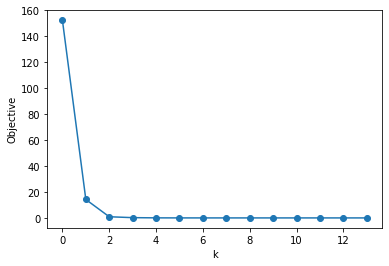

In [13]:
plt.plot(history['objectives'], 'o-')
plt.xlabel('k')
plt.ylabel('Objective')
plt.show()

In [14]:
np.vstack([5.379958476145877, 4.996349602562754])

array([[5.37995848],
       [4.9963496 ]])

**Location from range measurements.** The positions of the m = 5 points $a_i$ are given as rows in a 5 × 2 matrix `A`. The measurements are given in a 5-vector `rhos`. To simplify the code for the functions `f(x)` and `Df(x)` we add a function `dist(x)` that computes the vector of distances $(\|x − a_1\|, \ldots, \|x − a_m\|)$. The expression for the derivative is
$$
Df(x) = \begin{bmatrix}
\frac{x_1 − (a_1)_1}{\|x − a_1\|} & \frac{x_2 − (a_1)_2}{\|x − a_1\|} \\
\vdots & \vdots \\
\frac{x_1 − (a_m)_1}{\|x − a_m\|} & \frac{x_2 − (a_m)_2}{\|x − a_m\|}
\end{bmatrix}
$$
They can be evaluated as the product of a diagonal matrix with diagonal entries $1/\|x − a_i\|$ and the 5 × 2 matrix with i, j entry $(x − a_i)_j$.

In [15]:
# Five locations ai in a 5 by 2 matrix
A = np.array([[1.8, 2.5],
              [2.0, 1.7],
              [1.5, 1.5],
              [1.5, 2.0],
              [2.5, 1.5]])
# Vector of measured distances to five locations.
rhos = np.vstack([1.87288, 1.23950, 0.53672, 1.29273, 1.49353])
# dist(x) returns a 5-vector with the distances ||x-ai||.
dist = lambda x: np.vstack(np.sqrt(np.power((x[0] - A[:,0]), 2) + np.power((x[1] - A[:,1]), 2)))
# f(x) returns the five residuals.
f = lambda x: dist(x) - rhos
# Df(x) is the 5 by 2 derivative.
Df = lambda x: np.diag(1 / dist(x).T[0]) @ np.vstack([(x[0] - A[:, 0]), (x[1] - A[:,1])]).T

In [16]:
# Solve with starting point (1.8, 3.5) and lambda = 0.1
x1, history1 = levenberg_marquardt(f, Df, np.vstack([1.8, 3.5]).reshape(2,1), 0.1)
print(x1)

[[1.18248598]
 [0.82422894]]


In [17]:
# Starting point (3.0, 1.5)
x2, history2 = levenberg_marquardt(f, Df, np.vstack([3.0, 1.5]), 0.1)
print(x2)

[[1.18248579]
 [0.82422895]]


In [18]:
# Starting point (2.2, 3.5)
x3, history3 = levenberg_marquardt(f, Df, np.vstack([2.2, 3.5]), 0.1)
print(x3)

[[2.98526641]
 [2.1215768 ]]


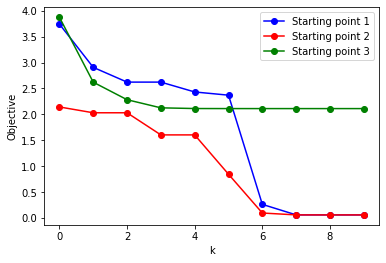

In [19]:
plt.plot(history1['objectives'][:10],'bo-')
plt.plot(history2['objectives'][:10],'ro-')
plt.plot(history3['objectives'][:10],'go-')
plt.legend(['Starting point 1','Starting point 2','Starting point 3'])
plt.xlabel('k')
plt.ylabel('Objective')
plt.show()

# 18.4 Nonlinear model fitting

$$
\text{minimize} \quad \sum^N_{i=1} (\hat{f}(x^{(i)}; \theta) − y^{(i)})^2
$$

- $x^{(1)}, \ldots, x^{(N)}$ are feature vectors
- $y^{(1)}, \ldots, y^{(N)}$ are associated outcomes
- model $\hat{f}(x; \theta)$ is parameterized by parameters $\theta_1, \ldots, \theta_p$
- this generalizes the *linear* in parameters model
$$
\hat{f}(x; \theta) = \theta_1f_1(x) + \cdots + \theta_pf_p(x)
$$
- here we allow $\hat{f}(x; \theta)$ to be a *nonlinear* function of $\theta$ (so it does not have the simple form of a linear combination of p basis functions)
- the minimization is over the model parameters $\theta$

**Example.** We fit a model
$$
f(x; \theta) = \theta_1 e^{\theta_2 x} cos(\theta_3 x + \theta_4)
$$
to N = 60 data points. We first generate the data.

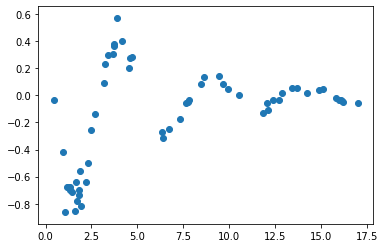

In [20]:
# Use these parameters to generate data
theta_ex = np.vstack([1, -0.2, 2*np.pi/5, np.pi/3])
# Choose 60 points x between 0 and 20.
M = 30
xd = np.vstack([5 * np.random.random((M, 1)),
                5 + 15 * np.random.random((M, 1))])
# Evaluate function at these points.
yd = theta_ex[0] * np.exp(theta_ex[1] * xd) * np.cos(theta_ex[2] * xd + theta_ex[3])
# Create a random perturbation of yd
N = len(xd)
yd = yd * (1 + 0.2 * np.random.randn(N, 1)) + 0.015 * np.random.randn(N, 1)

plt.scatter(xd, yd)
plt.show()

We now run our Levenberg-Marquardt code with starting point $\theta^{(1)} = (1, 0, 1, 0)$ and $\lambda^{(1)} = 1$.

In [21]:
f = lambda theta: theta[0] * np.exp(theta[1]*xd) * np.cos(theta[2] * xd + theta[3]) - yd
Df = lambda theta: np.hstack([
    np.exp(theta[1]*xd) * np.cos(theta[2] * xd + theta[3]), 
    theta[0] * (xd * np.exp(theta[1] * xd) * np.cos(theta[2] * xd + theta[3])),
    -theta[0] * (np.exp(theta[1] * xd) * xd * np.sin(theta[2] * xd + theta[3])),
    -theta[0] * (np.exp(theta[1]*xd) * np.sin(theta[2] * xd + theta[3]))
])

theta1 = np.vstack([1, 0, 1, 0])
theta, history = levenberg_marquardt(f, Df, theta1, 1.0)
x = np.linspace(0,20,500)
y = theta[0]*np.exp(theta[1]*x) * np.cos(theta[2]*x + theta[3])

[[ 1.        ]
 [-0.2       ]
 [ 1.25663706]
 [ 1.04719755]]
[[ 1.09347824]
 [-0.2232722 ]
 [ 1.25915825]
 [ 1.0366524 ]]


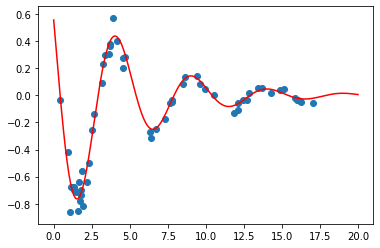

In [22]:
print(theta_ex)
print(theta)

plt.scatter(xd, yd)
plt.plot(x, y, 'r')
plt.show()

**Orthogonal distance regression**
$$
\text{minimize} \sum^N_{i=1} \big( (\hat{f}(u^{(i)}; \theta) − y^{(i)})^2 + \|u^{(i)} − x^{(i)}\|^2 \big)
$$
- optimization variables are model parameters $\theta$ and N points $u^(i)$
- ith term is squared distance of data point $(x^{(i)},y^{(i)})$ to point $(u^{(i)}, \hat{f}(u^{(i)}, \theta))$
$$
d^2_i = (\hat{f}(u^{(i)}; \theta) − y^{(i)})^2 + \|u^{(i)} − x^{(i)}\|^2
$$
- minimizing over $u^{(i)}$ gives squared distance of $(x^{(i)},y^{(i)})$ to graph
- minimizing over $u^{(1)}, \ldots, u^{(N)}$ and $\theta$ minimizes the sum square distance

use orthogonal distance regression to fit a cubic polynomial
$$
\hat{f}(x; \theta) = \theta_1 + \theta_2 x + \theta_3 x^2 + \theta_4 x^3
$$
to N = 25 data points.

We first read in the data and compute the standard least squares fit.

In [23]:
xd, yd = orth_dist_reg_data() # 2 vectors of length N = 25
N = len(xd)
p = 4
theta_ls = np.linalg.lstsq(np.vander(xd.ravel(), p, increasing=True), yd, rcond=None)[0]
theta_ls

array([[ 0.3275608 ],
       [-4.39266681],
       [11.0469174 ],
       [-7.09439643]])

The nonlinear least squares formulation on page 400 of VMLS has p + N variables $\theta_1, \ldots, \theta_p$, $u^{(1)}, \ldots, u^{(N)}$. We will store them in that order in the nonlinear least squares vector variable. The objective is to minimize the squared norm of the 2N-vector
$$
\begin{bmatrix}
  \hat{f}(u^{(1)}; \theta) − y^{(1)} \\
  \vdots \\
  \hat{f}(u^{(N)}; \theta) − y^{(N)} \\
  u^{(1)} − x^{(1)} \\
  \vdots \\
  u^{(N)} − x^{(N)} \\
\end{bmatrix}
$$

In [24]:
def f(x):
    theta = x[:p]
    u = x[p:]
    f1 = np.vander(u.ravel(), p, increasing=True) @ theta - yd
    f2 = u - xd
    return np.vstack([f1, f2])

def Df(x):
    theta = x[:p]
    u = x[p:]
    D11 = np.vander(u.ravel(), p, increasing=True)
    D12 = np.diag(theta[1] + 2*theta[2]*u.T[0] + 3*theta[3]*u.T[0]**2)
    D21 = np.zeros((N, p))
    D22 = np.eye(N)
    return np.block([[D11, D12], [D21, D22]])

We now call `levenberg_marquardt` function with these two functions. A natural choice for the initial points is to use the least squares solution for the variables $\theta$ and the data points $x^{(i)}$ for the variables $u^{(i)}$. We use $\lambda^{(1)} = 0.01$

In [25]:
sol, hist = levenberg_marquardt(f, Df, np.vstack([theta_ls, xd]), 0.01)
theta_od = sol[:p]

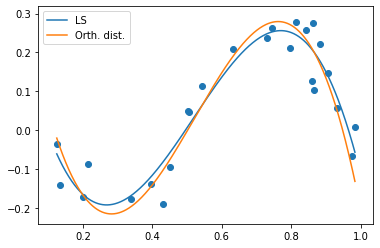

In [26]:
plt.scatter(xd, yd)
x = np.linspace(min(xd), max(xd), 500)
y_ls = np.vander(x.ravel(), p, increasing=True) @ theta_ls
y_od = np.vander(x.ravel(), p, increasing=True) @ theta_od
plt.plot(x, y_ls)
plt.plot(x, y_od)
plt.legend(['LS', 'Orth. dist.'])
plt.show()

# Nonlinear least squares classification

linear least squares classifier:
- classifier is $\hat{f}(x) = \mathbf{sign}(\tilde{f}(x))$ where $\tilde{f}(x) = \theta_1f_1(x) + \cdots + \theta_pf_p(x)$
- $\theta$ is chosen by minimizing $\sum^N_{i=1}(\tilde{f}(x_i) − y_i)^2$ (plus optionally regularization)

nonlinear least squares classifier:
- choose $\theta$ to minimize
$$
\sum^N_{i=1}(\mathbf{sign}(\tilde{f} (x_i)) − y_i)^2 = 4 \times \text{number of errors}
$$
- replace $\mathbf{sign}$ function with smooth approximation $\phi$, e.g., sigmoid function
- use Levenberg–Marquardt to minimize $\sum^N_{i=1}(\phi(\tilde{f} (x_i)) − y_i)^2$